In [1]:
import scipy as sp
from scipy import special
from scipy import optimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
#estados ligados
def j(x,l=0):
    return sp.special.spherical_jn(l,x,derivative=False)
def dj(x,l=0):
    return sp.special.spherical_jn(l,x,derivative=True)
def k(x,l=0):
    return sp.special.spherical_kn(l,x,derivative=False)
def dk(x,l=0):
    return sp.special.spherical_kn(l,x,derivative=True)

In [52]:
#-V<E<0
def F(E,V=1.0,l=0):
        return np.sqrt(-(1+V/E))*dj(np.sqrt(E+V),l)/j(np.sqrt(E+V),l)-dk(np.sqrt(-E),l)/k(np.sqrt(-E),l)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


(-10, 0)

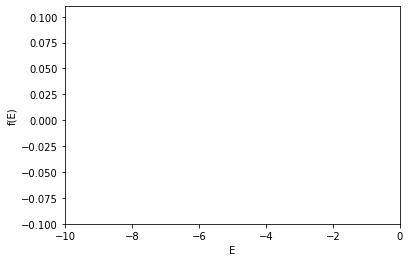

In [312]:
#potencial =10
V=40
l=4
E=-np.linspace(0,V,800)[1:]
def f(x):
    return F(x,V,l)
plt.scatter(E,f(E),s=1)
plt.xlabel('E')
plt.ylabel('f(E)')
plt.ylim((-0.1,0.11))
plt.xlim((-10,0))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


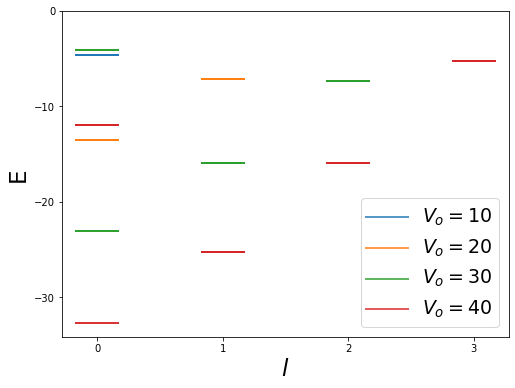

In [323]:
plt.figure(figsize=(8,6))
for V in range(10,50,10):
    LL=[]
    EE=-np.linspace(3,V,10000*V)
    CEROS=np.array([])
    for l in range(6):
        def f(x):
            return F(x,V,l)
        FF=f(EE)
        ceros=np.unique(np.around(EE[where(abs(FF)<0.0005)],decimals=3))
        CEROS=np.concatenate((CEROS,ceros),axis=0)
        for i in range(len(ceros)):
            LL.append(l)
    plt.scatter(LL,CEROS,label='$V_{o}=$'+str(V),marker='_',s=2000)
    A=np.zeros(shape=(len(LL),2))
    A[:,0]=LL
    A[:,1]=CEROS
    np.savetxt(str(V)+'_niveles.txt',A)
plt.xlabel('$l$',fontsize=23)
plt.ylabel('E',fontsize=23)
plt.legend(fontsize=19)
plt.yticks([0,-10,-20,-30])
plt.xticks([0,1,2,3])
plt.savefig('niveles.svg')

(-2, 2)

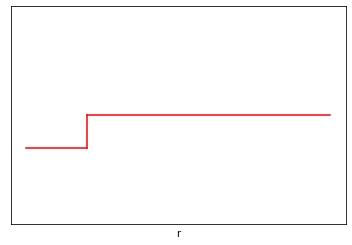

In [303]:
rmen=np.linspace(0,1,50)
rmay=np.linspace(1,5,50)
vin=-0.6*np.ones(50)
vout=np.zeros(50)
plt.plot(rmen,vin,c='red')
plt.plot(rmay,vout,c='red')
plt.plot([1,1],[-0.6,0],c='red')
plt.xticks([])
plt.yticks([])
plt.xlabel('r')
plt.ylim((-2,2))

In [2]:
#scattering 
def j(x,l=0):
    return sp.special.spherical_jn(l,x,derivative=False)
def dj(x,l=0):
    return sp.special.spherical_jn(l,x,derivative=True)
def n(x,l=0):
    return sp.special.spherical_yn(l,x,derivative=False)
def dn(x,l=0):
    return sp.special.spherical_yn(l,x,derivative=True)

In [3]:
def tand(E,V=10,l=0):
    A=np.sqrt(E+V)*dj(np.sqrt(E+V),l)*j(np.sqrt(E),l)-np.sqrt(E)*dj(np.sqrt(E),l)*j(np.sqrt(E+V),l)
    B=np.sqrt(E+V)*dj(np.sqrt(E+V),l)*n(np.sqrt(E),l)-np.sqrt(E)*dn(np.sqrt(E),l)*j(np.sqrt(E+V),l)
    return A/B

In [49]:
def sigma_n(E,V=10,l=0):
    return (2*l+1)*((tand(E,V,l)**2)/(1+tand(E,V,l)**2))/E

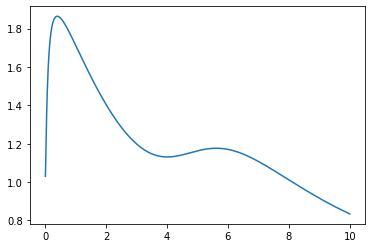

In [62]:
P=10
E=np.linspace(0,P,1000)[1:]
V=P
Y=np.zeros(len(E))
for l in range(4):
    T=np.zeros(len(Y))
    for i in range(len(T)):
        T[i]=sigma_n(E[i],V,l)
    Y=Y+T
plt.plot(E, Y)

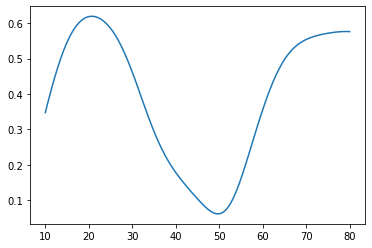

In [66]:
E=25.2
V=np.linspace(10,80,100)
Y=np.zeros(len(V))
for l in range(4):
    T=np.zeros(len(Y))
    for i in range(len(T)):
        T[i]=sigma_n(E,V[i],l)
    Y=Y+T
plt.plot(V, Y)